# Quality assessment of glacier mass change data from satellite observations: temporal/spatial resolution and completeness for glaciological and hydrological applications

- Data stream: satellite (observations)
- Quality area: spatial/temporal resolution, data coverage, trend assessment
- Application area: glaciological, climatological and/or hydrlogical applications, monitoring and models

Production date: 17-07-2024

Produced by: Yoni Verhaegen and Philippe Huybrechts (Vrije Universiteit Brussel)

## Use case: Using Greenland and Antarctic ice sheet mass change data as indicators for global climatic and water cycle changes in the context of the current global warming.

## Quality assessment question: "Is the dataset sufficiently consistent in terms of spatio-temporal completeness and resolution to derive multi-year trends in ice sheet mass changes and their corresponding contribution to global sea level rise?"

Ice sheets are a major contributor to current (and potentially future) global sea-level rise and can serve as clear indicators of ongoing climatic changes. Their changes furthermore play a key role in affecting (polar as well as global) ecosystems and several (feedback) mechanisms within the atmosphere, ocean and cryosphere. A proper assessment of ice sheet mass changes due to warming climatic conditions therefore plays a crucial role in dealing with these issues. In that regard, the 'Gravimetric mass balance data for the Antarctic (AIS) and Greenland (GrIS) ice sheets from 2003 to 2022 derived from satellite observations' dataset provides key information with respect to ice sheet mass change data for both the Greenland and Antarctic ice sheets. The dataset on the Climate Data Store (CDS) is based on satellite gravimetry, which enable mass changes to be measured regularly and consistently over the entire ice sheets. Remote sensing devices, such as used by the GRACE and GRACE-FO missions, are able to inspect directly and repeatedly large areas of ice. More particularly, the GRACE(-FO) missions are able to detect changes within the Earth’s gravitational field (resembling a redistribution of mass), and further processing of these data transforms this raw information into mass balance and mass change data (cumulative mass anomalies) of ice above buyoancy (Forsberg et al., 2017; Groh et al., 2019). Remote sensing techniques that use satellite data are therefore considered the only feasible manner to derive accurate mass change data of the remote ice sheets on a regular basis. This notebook investigates how well the resulting ice sheet mass change data can be used to monitor global climatic and water cycle changes. More specifically, the notebook investigates whether the mass change dataset is of sufficient maturity and quality in terms of its spatio-temporal completeness and resolution to derive multi-year trends in ice sheet mass changes and their corresponding contribution to global sea level rise.

## 📌 Quality assessment statement

- Mass change detection by GRACE(-FO) is a useful tool to quantify the total ice mass change of the Greenland (GrIS) and Antarctic (AIS) Ice Sheets but, however, it also has its limitations of which the user should take note before using the product. What GRACE(-FO) actually detects are patterns of mass redistribution, indicating that a material should be redistributed (e.g. by liquid discharge) in order for GRACE(-FO) to be able to detect the mass changes over certain locations. In that sense, an amount of melted ice being replaced by its mass-equivalent amount of meltwater at the same location would result in zero mass change. Only ice mass changes above buoyancy are considered in the dataset, mass changes of floating ice and ice below buoyancy for ice grounded below sea level are not considered (which is, however, relatively limited for the GrIS but can be significant for the AIS). GRACE(-FO) data are therefore considered to be the sum of mass changes driven by changing rates of solid ice discharge (i.e. ice flux across the grounding line) and mass changes driven by changing rates of runoff and accumulation (basal, internal and surface conditions) of ice above buoyancy.
- A large problem with the dataset is that no pixel-by-pixel mass change and error products are included for the ice sheets. Instead, only time series data of cumulative mass changes (cumulative mass anomalies) for various basins and the complete ice sheet are available from the data files. A spatial resolution at the basin-level is, however, clearly too coarse with respect to GCOS requirements (GCOS, 2022). Another issue with the data is the occurrence of (occasionally very) high error values. Data gaps are also present (e.g. during the transition period between GRACE and GRACE-FO in 2017-2018 CE). These are not filled up and not flagged, users need to identify them themselves. 
- Concerning the specific use case and user question, it can be stated that GRACE(-FO) data, with its long temporal extent (> 20 years), ice sheet-wide coverage and monthly temporal resolution, effectively captures long-term trends and variability of ice sheet mass changes, serving as a reliable indicator of global climate change and sea level contributions. The dataset is suitable for assessing ice sheet-wide and basin-scale mass changes due to its comprehensive temporal and spatial coverage, despite a significant gap between GRACE and GRACE-FO in 2017-2018. Because GRACE(-FO) results are always presented relative to something (i.e. the previous data acquisition or a reference time) and there is no systematic bias between the GRACE and GRACE-FO time series (Velicogna et al., 2020), it is, however, believed that these data gaps do not impact the overall magnitude of the cumulative mass balance anomaly of the time series. Overall, GRACE(-FO) provides valuable data on ice mass changes, making it a crucial tool for understanding and quantifying global climate change and water cycle dynamics.

## ❓ Methodology

### Short description

The total mass balance of an ice sheet is the difference between mass gained (from snow accumulation) and mass lost (by runoff or solid ice discharge across the grounding line), which is the same as the net mass change of the ice sheet. Remote sensing techniques, such as the use of satellites, are an important feature to derive and study the mass changes of the ice sheets. The 'Gravimetric mass balance data for the Antarctic and Greenland ice sheets from 2003 to 2020 derived from satellite observations' dataset provides monthly gravimetric mass balance (GMB) values and their uncertainty for the Greenland (GrIS) and the Antarctic Ice Sheet (AIS). The data represent a time series of the cumulative mass changes (mass anomalies) of the ice above buoyancy of the ice sheets and their basins that are derived using satellite gravimetry data from the GRACE(-FO) missions. Data are available for the whole ice sheet, as well as at the basin level, but no gridded data are provided. Data are available since 2002 with units in Gt (Gigatonnes). For a more detailed description of the data acquisition and processing methods, we refer to the documentation on the CDS and the ECMWF Confluence Wiki.

### Structure and (sub)sections

In this notebook, the applicability of ice sheet mass change data to be used for global climate change and water cycle change monitoring will be assessed. We will check whether the data are of sufficient adequacy in terms of its accuracy and its spatio-temporal completeness and resolution to be used for this purpose. This will be realized by analyzing the spatial and temporal characteristics of ice sheet mass change data, by assessing the spatial and temporal resolution and coverage of the dataset, by discussing other potential limitations and error sources of the dataset, and by evaluating the implications for the usage of the data in terms of the specific use case and question (i.e. monitoring global climate and global water cycle changes). The structure is as follows:

- **Data preparation and processing**: this section loads packages, defines requests for download from the CDS, downloads the actual data and inspects the data to reveal its structure. Also the functions that are used in this notebook are defined in this section.
- **Quantifying Greenland and Antarctic Ice Sheet mass changes over time**: this section derives and discusses cumulative ice sheet mass changes for Greenland and Antarctica since 2002 from GRACE-(FO) and expresses it as a time series for the ice sheet-wide spatial scale.
- **Analysis of spatio-temporal resolution and coverage of the GRACE(-FO) mass change estimates**: this section further discusses the temporal and spatial coverage of the data in the ice sheet mass change product, and quantifies the amount of data gaps present.
- **Ice sheet mass changes (linear and quadratic) trends and sea level contribution over time**: here, we calculate the linear and quadratic trend of the ice sheet-wide ice mass change time series. We also convert the cumulative mass changes into global sea level changes.
- **Implications for use of GRACE(-FO) mass change data as global climate change and sea level change indicators**: the final section uses all information derived above to assess the suitability of the ice sheet mass change dataset (with respect to its spatial/temporal coverage and resolution) to use the product as indicators for global climatic and water cycle changes in the context of the current global warming.

## 📋 Analysis and results

### ⏬ Data preparation and processing

First we load the packages:

In [26]:
import fsspec
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.ticker as mticker
import numpy as np
import xarray as xr
from scipy.stats import linregress
from matplotlib.gridspec import GridSpec
import re
from math import ceil
import scipy.stats
import pandas as pd
import calendar
import os
os.environ["CDSAPI_RC"] = os.path.expanduser("~/verhaegen_yoni/.cdsapirc")
from c3s_eqc_automatic_quality_control import download

plt.style.use("seaborn-v0_8-notebook")

Then we define the parameters, i.e. for which ice sheet (or which basins of these ice sheets) we want the mass change data to be extracted:

In [44]:
variables = ["GrIS_total", "AntIS_total"]

Then we define requests for download from the CDS and download and transform the glacier mass change data.

In [45]:
collection_id = "satellite-ice-sheet-mass-balance"
request = {
    "variable": "all",
    "format": "zip",
}
ds = download.download_and_transform(collection_id, request)
ds = ds[variables].compute()
ds = xr.combine_by_coords([ds])
print("Downloading done.")

100%|██████████| 1/1 [00:00<00:00,  3.26it/s]


Let us inspect the data:

In [46]:
ds

<xarray.Dataset> Size: 3kB
Dimensions:      (time: 216)
Coordinates:
  * time         (time) datetime64[ns] 2kB 2002-04-16T20:23:54.375000 ... 202...
Data variables:
    GrIS_total   (time) float32 864B 1.057e+03 1.123e+03 ... -3.762e+03
    AntIS_total  (time) float32 864B 345.6 488.9 467.3 ... -910.0 -843.2 nan
Attributes:
    Title:                GMB for Greenland and Antarctica ice sheets from th...
    institution:          DTU Space - Geodesy and Earth Observations
    reference:            Baratta et al. (2016), Groh and Horwart (2016)
    file_creation_date:   Tue May 16 09:49:32 2023
    region:               Greenland and Antarctica
    missions_used:        GRACE and and GRACE-FO
    time_coverage_start:  Apr-2002
    time_coverage_end:    Dec-2022
    Tracking_id:          ab2360a4-82d5-42f3-babb-90ce976a8a8e
    netCDF_version:       NETCDF4
    product_version:      4.0
    Summary:              This data set is prepared for the C3S project, and ...

It is a dataset that consists of time series data, containing cumulative values of the total ice sheet mass change of, in this case, the entire Greenland Ice Sheet (`GrIS_total`) and the entire Antarctic Ice Sheet (`AntIS_total`) since 2002. Mass changes are expressed in units of Gt and the time period between two measurements is variable. Note that no gridded data are given in this dataset, and hence no spatial resolution can be derived.

Let us perform some data handling before getting started with the analysis. We also define a plotting function to visualize the time series:

In [48]:
def plot_timeseries(ds):
    # Define specific names for the first and second variables
    variable_names = {
        "first_variable_name": "Cumulative mass change of the Greenland Ice Sheet from GRACE(-FO)",
        "second_variable_name": "Cumulative mass change of the Antarctic Ice Sheet from GRACE(-FO)"
    }
    
    variables = list(ds.data_vars.values())
    num_vars = len(variables)
    
    # Determine the number of columns needed based on the number of variables
    num_cols = (num_vars + 1) // 2  # Integer division to ensure enough columns
    
    fig = plt.figure(figsize=(10 * num_cols, 8))
    gs = GridSpec(2, num_cols, figure=fig)
    
    for i, var in enumerate(variables):
        row = i % 2
        col = i // 2
        ax = fig.add_subplot(gs[row, col])
        var.plot(ax=ax, color='k')
        ax.set_title(f"{var.attrs.get('region', '')}")
        ax.set_xlim(np.min(ds["time"]), np.max(ds["time"]))
        ax.grid(color='#95a5a6', linestyle='-', alpha=0.25)

    plt.tight_layout()
    return fig, gs

# Dataset processing
variables_to_drop = [var for var in ds.data_vars if '_er' in var]
ds = ds.drop_vars(variables_to_drop)

year_to_ns = 1.0e9 * 60 * 60 * 24 * 365
with xr.set_options(keep_attrs=True):
    ds = ds - ds.isel(time=0)
    
# Set custom attributes for variables
for i, (var, da) in enumerate(ds.data_vars.items()):
    if i == 0:
        da.attrs["region"] = "Cumulative mass change of the Greenland Ice Sheet from GRACE(-FO)"
    elif i == 1:
        da.attrs["region"] = "Cumulative mass change of the Antarctic Ice Sheet from GRACE(-FO)"
    else:
        da.attrs["region"] = da.attrs["long_name"].split("_", 1)[0].title()
    da.attrs["long_name"] = "Cumulative mass change"


With everything ready, let us now start with the analysis:

### 📉 Quantifying Greenland and Antarctic Ice Sheet mass changes over time

We begin by plotting the Greenland and Antarctic Ice Sheet cumulative mass change $\Delta M_{GRACE}$ between the begin and end period with the defined plotting function:

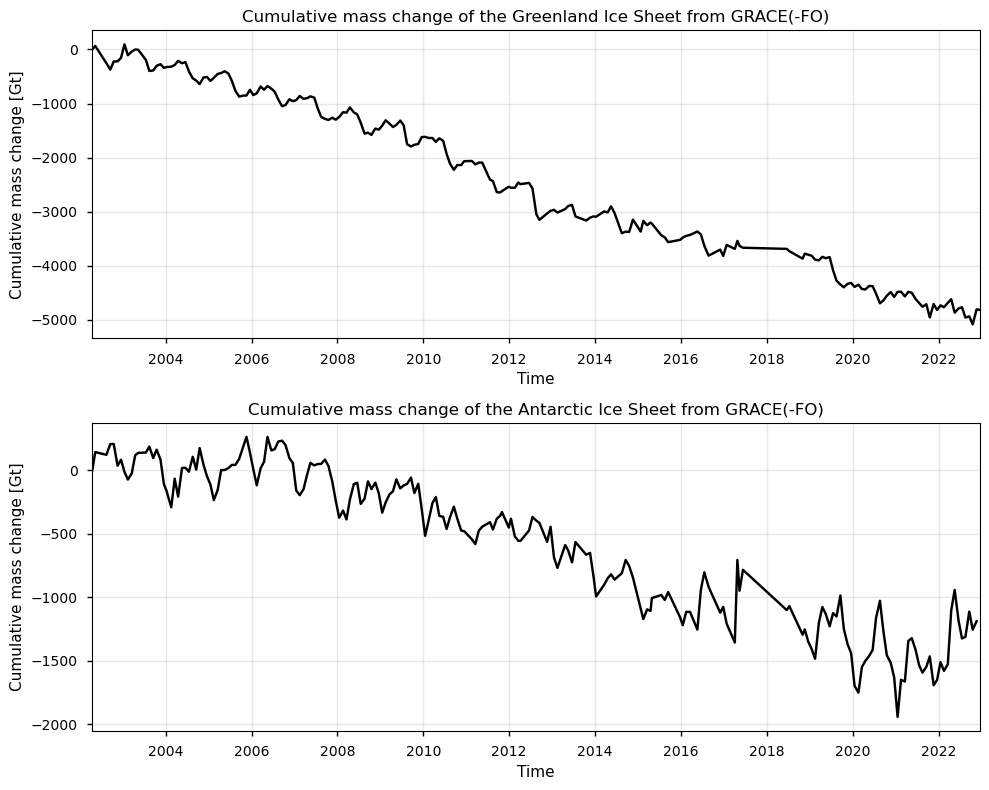

In [21]:
fig, gs = plot_timeseries(ds)

The mass changes derived from GRACE(-FO) are measured in gigatonnes (Gt). One gigatonne (Gt) is a unit of mass, and is the same irrespective of whether it is attributed to ice or water. For context, one Gt of water, with a density of 1000 kg/m$^3$, equals one cubic kilometer (km$^3$). In contrast, due to ice's density of 917 kg/m$^3$, one Gt of ice translates to 1.091 km$^3$. GRACE(-FO) data capture mass changes as a result of varying rates of solid ice discharge across the grounding line (due to ice dynamics) and shifts in runoff and accumulation rates (affected by basal, internal, and surface climatic conditions). Essentially, GRACE(-FO) detects patterns of mass redistribution, requiring material movement (such as liquid discharge) to identify gravity anomalies and mass changes at specific locations. Thus, melted ice replaced by an equivalent mass of meltwater at the same site results in zero net mass change. The dataset only includes changes of ice above buoyancy, and hence excludes floating ice mass changes and ice below buoyancy for ice grounded below sea level, which are relatively minimal for the Greenland Ice Sheet (GrIS) but can be significant for the Antarctic Ice Sheet (AIS). However, in the sense of climate change impact, the direct contribution of ice below buyoancy to global sea-level change is quasi zero.

The provided graphs show the cumulative mass change of the Greenland Ice Sheet and the Antarctic Ice Sheet since 2002, as measured by GRACE(-FO) satellites. The Greenland Ice Sheet shows a clear and consistent decline in mass, having lost approximately 5000 gigatonnes (Gt) over the period. This steady loss, with brief periods of slowed decline, indicates a strong response to climatic factors such as rising temperatures, leading to increased liquid discharge (increased surface melt and runoff). In contrast, the Antarctic Ice Sheet also exhibits a downward trend, with a cumulative loss of around 1250 Gt by the end of the period. However, the Antarctic mass change graph displays more pronounced fluctuations, suggesting the influence of complex dynamics like variations in solid ice discharge rates and localized climatic conditions, such as increased precipitation. For Greenland, mass loss is dominated by meltwater runoff, combined with the solid ice discharge towards the sea across the grounding line of outlet glaciers. For Antarctica, mass loss primarily occurs through the discharge of ice across the grounding line, with surface melting playing a minor role. Here, interactions between the ice sheet and the warming ocean, combined with dynamic responses within the ice sheet itself (e.g. an acceleration of outlet glaciers due to a reduced buttressing from the ice shelves), are central to understanding why Antarctica's mass is currently decreasing (Forsberg et al., 2017; Groh et al., 2019).

### ✅ Analysis of spatio-temporal resolution and coverage of the GRACE(-FO) mass change estimates

Now that we have visualized the temporal patterns of the mass changes, we can investigate the spatio-temporal resolution and extent of the GrIS and AIS mass changes. Let us begin by identifying temporal data gaps (coverage) and the temporal resolution in the time series:

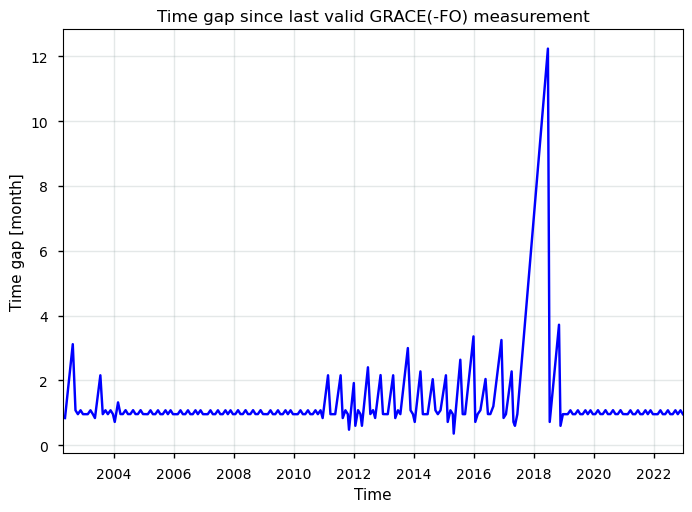

In [22]:
time_gap_months = 12 * ds["time"].diff("time").astype(int) / year_to_ns

# Create the plot
fig, ax = plt.subplots()
time_gap_months.plot(ax=ax, color='b')
ax.set_ylabel("Time gap [month]")
ax.grid(color='#95a5a6', linestyle='-', alpha=0.25)
ax.set_xlim(np.min(ds["time"]), np.max(ds["time"]))
ax.set_title("Time gap since last valid GRACE(-FO) measurement")
plt.show()

The plot displays the time gaps in the GRACE(-FO) data collection over time, which are the same for the GrIS and the AIS, highlighting periods of consistent monthly data acquisition and (significant) data gaps. The most prominent feature is the large time gap around 2017-2018, where the gap extends up to 12 months. This significant gap corresponds to the end of the original GRACE mission and the transition period before the launch of the GRACE Follow-On (GRACE-FO) mission. During this period, there was an inability to acquire data, as the original GRACE satellites were decommissioned and the new GRACE-FO satellites were not yet operational. Because GRACE(-FO) results are always presented relative to something (i.e. the previous data acquisition or a reference time) and there is no systematic bias between the GRACE and GRACE-FO time series (Velicogna et al., 2020), it is, however, believed that these data gaps do not impact the overall magnitude of the cumulative mass balance anomaly of the time series. Generally, a temporal resolution of approximately 1 month (which is mostly the case) is observed, aligning with the optimal requirement proposed by GCOS (2022).

Let us have this quantified:

In [23]:
start, end = ds["time"].isel(time=[0, -1]).dt.strftime("%d/%m/%Y").values.tolist()

for string, date in zip(("start", "end"), (start, end)):
    print(f"The {string:^5} date of the time series is", date)

expected = len(pd.date_range(start, end, freq="ME", inclusive="both"))
actual = len(set(ds["time"].dt.strftime("%Y%m").values))
for string, date in zip(("expected", "present"), (expected, actual)):
    print(f"The amount of months with mass change measurements that is {string} between these two dates is", date)

missing = 100 * abs(expected - actual) / expected
print(f"For a consistent monthly temporal resolution, the amount of months with missing data is {missing:.2f}%.")

The start date of the time series is 16/04/2002
The  end  date of the time series is 17/12/2022
The amount of months with mass change measurements that is expected between these two dates is 248
The amount of months with mass change measurements that is present between these two dates is 213
For a consistent monthly temporal resolution, the amount of months with missing data is 14.11%.


Concerning spatial coverage, a significant challenge in analyzing the ice sheet's mass changes (especially for the GrIS) is deciding whether to include the peripheral glaciers and ice caps. The GRACE(-FO) GMB data include all ice masses in Greenland (and Antarctica) due to the coarse spatial resolution of several hundred kilometers during the data acquisition, which prevents differentiation between closely situated ice bodies. As a result, the mass changes of Greenland's peripheral glaciers and ice caps, which contribute approximately 30-35 Gt/year (Otosaka et al., 2023), are included in these measurements. To exclude these peripheral areas from the GRACE(-FO) time series, a scaling factor of 0.84 is often used for the GrIS (Bolch et al., 2013; Colgan et al., 2015). It must be furthermore noted that only mass changes of ice above buoyancy are considered in the GMB dataset (of which the impact is, however, relatively limited for the GrIS but can be significant for the AIS). 

The lack of downloadable gridded data further complicates the spatial resolution issue, although such pixel-by-pixel data are available from other sources like the TU Dresden website. The currently available data are provided as time series for the entire ice sheet's and their basins, which is too coarse to meet GCOS requirements and poses challenges, for example for ice sheet models that require gridded inputs. Moreover, the coarse spatial resolution of GRACE(-FO) data during their acquisition (several hundred kilometers) can obscure the boundaries between different basins, making it difficult to accurately assign mass changes to specific regions due to leakage errors, such as those influenced by the proximity of Canadian ice caps in the case of Greenland.

### ❄️ Ice sheet mass changes (linear and quadratic) trends and sea level contribution over time

With the imformation above, let us now go on and calculate linear and quadratic trends for the ice sheet mass change product:

Cumulative mass change of the Greenland Ice Sheet from GRACE(-FO):
	The slope of the ice sheet mass change is -251.329 Gt/yr.
	The trend is significant at an alpha level of 0.05, i.e. a monotonic trend is present.
	The acceleration of the ice sheet mass change is 3.240 Gt/yr^2.
Cumulative mass change of the Antarctic Ice Sheet from GRACE(-FO):
	The slope of the ice sheet mass change is -89.873 Gt/yr.
	The trend is significant at an alpha level of 0.05, i.e. a monotonic trend is present.
	The acceleration of the ice sheet mass change is -2.354 Gt/yr^2.


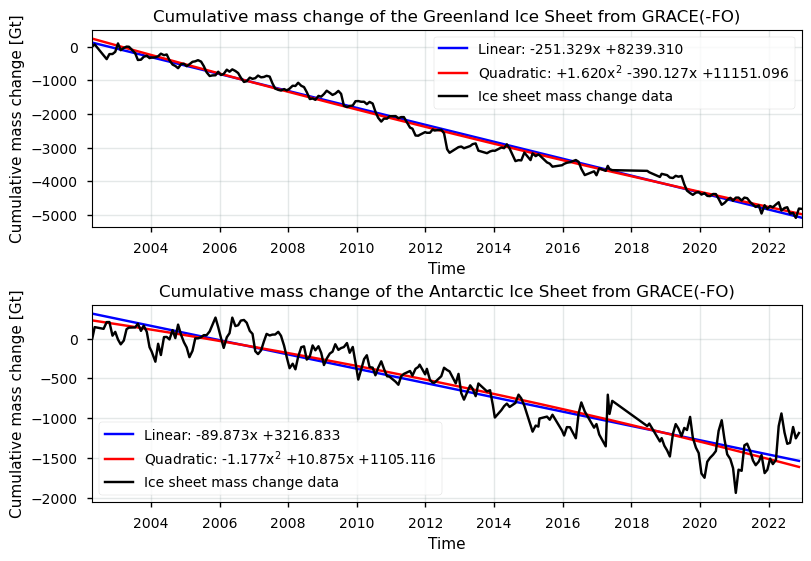

In [49]:
fig, axs = plt.subplots(len(variables), 1, layout="constrained")
colors = {
    "data": "black",
    "linear": "blue",
    "quadratic": "red"
}
for ax, da in zip(axs, ds.data_vars.values()):
    da = da.dropna("time")
    print(da.attrs["region"] + ":")
    for label, degree, color in zip(
        (
            "Linear",
            "Quadratic",
        ),
        (1, 2),
        (colors["linear"], colors["quadratic"]),
    ):
        # Compute coefficients
        coeffs = da.polyfit("time", degree)["polyfit_coefficients"]

        # Plot trends and print stats
        equation = []
        for deg, coeff in coeffs.groupby("degree"):
            coeff = coeff.squeeze() * (year_to_ns**deg)
            if deg == degree:
                if deg == 1:
                    quantity = "slope"
                    units = "Gt/yr"
                elif deg == 2:
                    quantity = "acceleration"
                    units = "Gt/yr^2"
                else:
                    raise ValueError(f"{deg=}")
                print(
                    f"\tThe {quantity} of the ice sheet mass change is {degree*coeff:.3f} {units}."
                )
                if deg == 1:
                    _, p_value = scipy.stats.kendalltau(da["time"], da)
                    significance_level = 0.05
                    is_significant = p_value < significance_level
                    print(
                        " ".join(
                            [
                                "\tThe trend",
                                "is significant"
                                if is_significant
                                else "is not significant",
                                f"at an alpha level of {significance_level}, i.e. a monotonic trend",
                                "is present." if is_significant else "is not present.",
                            ]
                        )
                    )
            equation.append(
                f"{float(coeff):+.3f}{'x' if deg else ''}{f'$^{deg}$' if deg>1 else ''}"
            )
        label = f"{label}: {' '.join(equation[::-1])}"
        fit = xr.polyval(da["time"], coeffs)
        fit.plot(label=label, ax=ax, color=color)
    da.plot(label="Ice sheet mass change data", ax=ax, color='k')
    ax.set_title(f"{da.attrs['region']}")
    ax.set_xlim(np.min(ds["time"]), np.max(ds["time"]))
    ax.grid(color='#95a5a6', linestyle='-', alpha=0.25)
    ax.legend()

The GRACE(-FO) data plots illustrate the cumulative mass changes of the Greenland and Antarctic Ice Sheets over time. For the Greenland Ice Sheet, the linear trend indicates a significant and consistent annual mass loss of approximately 250 gigatonnes per year, with a statistically significant monotonic trend at an alpha level of 0.05. Hence, the analysis reveales accelerated mass losses from 2002 until 2012-2013, followed by a slowdown until the years 2017-2018. Then, for the more recent period from 2019 onwards up until now, mass loss acceleration is again reoccurring (e.g. Sasgen et al., 2020; Otosaka et al., 2023). Similarly, the Antarctic Ice Sheet data show a significant linear trend, with an annual mass loss of approximately 90 gigatonnes per year. This trend is also statistically significant at an alpha level of 0.05. Mass changes were fairly stable fom 2002 until 2007, but slightly accelerating mass loss has occurred after 2007-2008. During the more recent years, a slight deceleration in the mass changes is noted (e.g. Sasgen et al., 2019; Fox-Kemper et al., 2021).. Both the Greenland and Antarctic Ice Sheets thus exhibit significant ongoing mass loss, with the statistical significance of the trends underscoring the robustness of these findings. The linear and quadratic trend lines, depicted in red and green respectively, provide a clear visual representation of these trends, highlighting the critical changes occurring in the polar regions 

We furthermore note again that GRACE(-FO) cannot detect changes in floating ice and ice below buoyancy for ice grounded below sea level. Mass change processes occurring beyond the grounding line, such as a retreating calving front, ocean-induced melt beneath the ice shelves, as well as changes to the part of the ice that is occupied by water (or in other words ice below buouyancy) will therefore not be detectable (because it is occupied by the same mass of water). In that regard, GMB measurements by GRACE(-FO) are immediately convertible to sea level contributions. These changes in mean global sea level can be caused by various processes. Mass changes of ice sheets are only a part of the total contribution:

$\Delta SL = \Delta SL_{steric} + \Delta SL_{VLM} + \Delta SL_{glac} + \Delta SL_{IS} + \Delta SL_{LWS} + \Delta SL_{other}$

where $\Delta SL_{steric}$ is the term related to changes in density caused by variations in temperature (thermosteric) and salinity (halosteric), $\Delta SL_{VLM}$ is the term related to changes due to vertical land motion, $\Delta SL_{glac}$ and $\Delta SL_{IS}$ are related to mass addition/removal by glaciers, ice caps, and ice sheets, $\Delta SL_{LWS}$ is a land water storage term that includes processes such as deep groundwater mining and dam building, and lastly, $\Delta SL_{other}$ quantifies the other remaining and less significant processes, such as the presence and melting of a seasonal snow cover. For the contributions of ice sheets, we assume that 361.8 Gt of ice will raise global sea levels by 1 mm (where 361.8 Gt of ice is equivalent to 394.67 km$^3$ ice):

$
\Delta SL_{IS} = h_{SLE} 
$
[mm]
$
= -\dfrac{M_{GRACE}}{361.8}
$

where $M_{GRACE}$ is the cumulative mass change of the ice sheets measured by GRACE(-FO) in Gt. Let us plot this:

Cumulative global sea level contribution of the Greenland Ice Sheet from GRACE(-FO):
	The slope of the global sea level contribution is 0.695 mm/yr.
	The trend is significant at an alpha level of 0.05, i.e. a monotonic trend is present.
	The acceleration of the global sea level contribution is -0.009 mm/yr^2.
Cumulative global sea level contribution of the Antarctic Ice Sheet from GRACE(-FO):
	The slope of the global sea level contribution is 0.248 mm/yr.
	The trend is significant at an alpha level of 0.05, i.e. a monotonic trend is present.
	The acceleration of the global sea level contribution is 0.007 mm/yr^2.


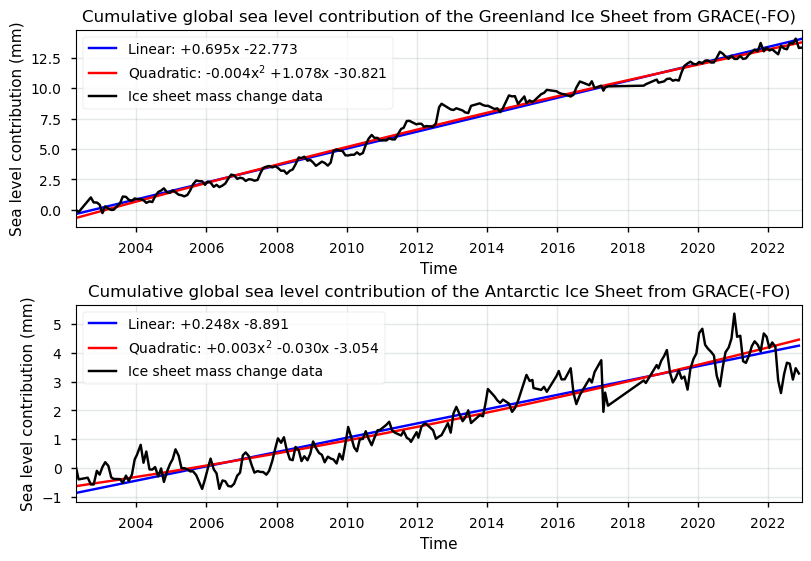

In [54]:
fig, axs = plt.subplots(len(variables), 1, layout="constrained")
colors = {
    "data": "black",
    "linear": "blue",
    "quadratic": "red"
}
# Convert mass change to global sea level change
ds_SL = -(ds/361.8)
for i, (var, da) in enumerate(ds_SL.data_vars.items()):
    if i == 0:
        da.attrs["region"] = "Cumulative global sea level contribution of the Greenland Ice Sheet from GRACE(-FO)"

    elif i == 1:
        da.attrs["region"] = "Cumulative global sea level contribution of the Antarctic Ice Sheet from GRACE(-FO)"
    else:
        da.attrs["region"] = da.attrs["long_name"].split("_", 1)[0].title()
    da.attrs["long_name"] = "Sea level contribution (mm)"
# Plot the data and trends
for ax, da in zip(axs, ds_SL.data_vars.values()):
    da = da.dropna("time")
    print(da.attrs["region"] + ":")
    for label, degree, color in zip(
        (
            "Linear",
            "Quadratic",
        ),
        (1, 2),
        (colors["linear"], colors["quadratic"]),
    ):
        # Compute coefficients
        coeffs = da.polyfit("time", degree)["polyfit_coefficients"]

        # Plot trends and print stats
        equation = []
        for deg, coeff in coeffs.groupby("degree"):
            coeff = coeff.squeeze() * (year_to_ns**deg)
            if deg == degree:
                if deg == 1:
                    quantity = "slope"
                    units = "mm/yr"
                elif deg == 2:
                    quantity = "acceleration"
                    units = "mm/yr^2"
                else:
                    raise ValueError(f"{deg=}")
                print(
                    f"\tThe {quantity} of the global sea level contribution is {degree*coeff:.3f} {units}."
                )
                if deg == 1:
                    _, p_value = scipy.stats.kendalltau(da["time"], da)
                    significance_level = 0.05
                    is_significant = p_value < significance_level
                    print(
                        " ".join(
                            [
                                "\tThe trend",
                                "is significant"
                                if is_significant
                                else "is not significant",
                                f"at an alpha level of {significance_level}, i.e. a monotonic trend",
                                "is present." if is_significant else "is not present.",
                            ]
                        )
                    )
            equation.append(
                f"{float(coeff):+.3f}{'x' if deg else ''}{f'$^{deg}$' if deg>1 else ''}"
            )
        label = f"{label}: {' '.join(equation[::-1])}"
        fit = xr.polyval(da["time"], coeffs)
        fit.plot(label=label, ax=ax, color=color)
    da.plot(label="Ice sheet mass change data", ax=ax, color='k')
    ax.set_title(f"{da.attrs['region']}")
    ax.set_xlim(np.min(ds_SL["time"]), np.max(ds_SL["time"]))
    ax.grid(color='#95a5a6', linestyle='-', alpha=0.25)
    ax.legend()

The provided graphs illustrate the cumulative global sea level contributions of the Greenland and Antarctic Ice Sheets based on GRACE(-FO) data, along with linear and quadratic trend analyses. These plots provide insights into the rate and nature of sea level contributions from these ice sheets over time. Overall, these graphs emphasize the significant and ongoing contributions of both the Greenland and Antarctic Ice Sheets to global sea level rise. The linear trends and their significance highlight a consistent ongoing increase in sea level contributions, with Greenland contributing more significantly compared to Antarctica. The trends and their magnitudes observed in the GRACE(-FO) data for both the Greenland and Antarctic Ice Sheets are broadly consistent with the findings reported in the literature (e.g. Bamber et al., 2018; Rignot et al., 2019; Fox-Kemper et al., 2021), highlighting the reliability and quality-richness of GRACE(-FO) data with respect to capturing significant ice mass changes and their impact on global sea level rise. 

### 📌 Implications for use of GRACE(-FO) mass change data as global climate change and sea level change indicators

Let us now consider the suitability of GRACE(-FO) data with respect to the specific use case and user question. When measured over a long period and at extended geographical scales (distinct ice sheet basins or over the complete ice sheet), trends in ice sheet mass changes or mass balances can be considered a clear indicator of global climate change. However, for these trends to be accruate, representative and reliable, the dataset should have an adequate spatial/temporal resolution and coverage (extent). From the above analysis, it can be stated that the dataset provides a suitable spatial and temporal extent (coverage) to capture both linear and quadratic trends in ice sheet mass changes, enabling detailed analysis of long-term basin-scale or ice sheet-wide mass change trends. 

One of the key strengths of GRACE(-FO) is its spatial coverage, allowing for the monitoring of ice mass changes across all major ice sheets, including remote and inaccessible regions. Unlike other remote sensing methods that infer mass changes from surface elevation changes or ice flow velocities, GRACE(-FO) directly measures variations or anomalies in the Earth's gravitational field, which are directly related to changes in mass and a redistribution of that mass. Coupled with the monthly temporal resolution of GRACE(-FO) data, the dataset enables the detection of seasonal and interannual variations in ice sheet mass balance (cumulative mass anomalies). The dataset’s comprehensive temporal (> 20 years) and spatial (ice sheet-wide) coverage of the world’s ice sheets furthermore ensures that these trends are meaningful and can be assessed at both regional (basins) and ice sheet-wide spatial scales. Despite the fact that the Intergovernmental Panel on Climate Change (IPCC) uses 30 years as a standard period for climate normals and trend analysis to ensure that the analysis captures meaningful climatic changes, the temporal coverage since 2002 already allows for clear temporal patterns to be detected. The continuity of data from GRACE (2002-2017) to GRACE-FO (2018-present) thus provides a long-term, consistent dataset that is crucial for detecting trends and changes over time. The statistical significance of these trends further underscores the reliability of using this dataset to monitor climatic changes and global water cycle changes. 

However, the detection of gravity-derived ice mass changes also has its limitations of which the user should take note before using the product. The coarse spatial resolution (several hundred kilometers) during data acquisition limits its ability to capture small-scale patterns, as well as to separate closely situated ice mass bodies, such as the Canadian ice caps around Greenland. This can result in signal leakage between adjacent regions, complicating the attribution of mass changes to specific sources. Additionally, GRACE(-FO) measurements can be affected by uncertainties related to the Earth’s gravitational field (e.g. due to the shift of the Earth’s center of mass, or due to the influence of the atmosphere and oceans on the Earth’s gravity field), as well as by mass changes not related to the ice sheet, such as glacial isostatic adjustment and a seasonal snow cover over ice-free areas. Especially the glacial isostatic adjustment corrections that have been performed on the data introduce relatively high uncertainties. This is because separating this signal from the actual loss of ice mass is complex and requires sophisticated modeling. Another large problem with the dataset is that no pixel-by-pixel mass change and error products are included for the ice sheets. Users should take into account the inability to infer mass change trends at a spatial resolution finer than the basin-scale. 

Apart from that, users should also acknowledge what GRACE(-FO) ice mass changes represent. What GRACE(-FO) actually detects are patterns of mass redistribution, indicating that a material should be redistributed (e.g. by liquid discharge) in order for GRACE(-FO) to be able to detect gravity anomalies and the corresponding mass changes over certain locations. Only ice mass changes of ice above buoyancy are considered in the dataset, mass changes of floating ice and ice below buyoancy for ice grounded below sea level are not considered, because it gets replaced by a mass-equivalent amount of water (which is, however, relatively limited for the GrIS but can be significant for the AIS). GRACE(-FO) data are therefore considered to be the sum of mass changes driven by changing rates of solid ice discharge (i.e. ice dynamics) and mass changes driven by changing rates of runoff and accumulation (basal, internal and surface conditions) for ice above buoyancy at the basin-scale or ice sheet-wide scale. For the GrIS, the mass changes include signals from the peripheral glaciers and ice caps, but for the AIS this excludes data for the ice shelves. In the sense of global water cycle changes, this means that GMB measurements by GRACE(-FO) are immediately convertible to sea level contributions.

The time series of the basin-scale and ice-sheet wide GMB products are thus found to be suitable to derive mean, variability and trends (i.e. climate change signals), as (1) the amount of missing data is relatively limited (despite the gap between GRACE and GRACE-FO in 2017/2018), (2) the temporal resolution is mostly consistent at 1-monthly spaced time intervals, and (3) the number of consecutive years is generally sufficient to filter out inter and intrayearly variability. The GMB products are thus found to be highly applicable to derive mass changes of ice above buyoancy over time and to, for example, assess the corresponding impact on global sea level changes. Due to the (occasionally very) high error and uncertainty values, however, the GMB product should be handled with care. In conclusion, GRACE(-FO) provides valuable data on ice sheet mass changes, making it an essential tool for understanding and quantifying globale climate change and global water cycle changes. While it has certain limitations that have to be taken into account during quality assessment, its strengths as an ice sheet-wide, direct ice mass change measurement tool make it essential to capture ice sheet mass changes and their contributions to sea level rise. 

## 🔍 If you want to know more

### Key resources

- "Gravimetric mass balance data for the Antarctic and Greenland ice sheets from 2003 to 2022 derived from satellite observations" on the CDS.
- [C3S EQC custom functions](https://github.com/bopen/c3s-eqc-automatic-quality-control/tree/main/c3s_eqc_automatic_quality_control), `c3s_eqc_automatic_quality_control` prepared by [BOpen](https://www.bopen.eu).

### References

- Bamber, J. L., Westaway, R. M., Marzeion, B., and Wouters, B. (2018). The land ice contribution to sea level during the satellite era. Environ. Res. Lett. 13, https://doi.org/10.1088/1748-9326/aac2f0.

- Bolch, T., Sørensen, L.S., Simonsen, S. B., Mölg, N., Machguth, H., Rastner, P., & Paul, F. (2013). Mass loss of Greenland's glaciers and ice caps 2003–2008 revealed from ICESat laser altimetry data. Geophysical Research Letters, 40(5), 875-881. https://doi.org/10.1002/grl.50270.

- Colgan, W., Abdalati, W., Citterio, M., Csatho, B., Fettweis, X., Luthcke, S., Moholdt, G., Simonsen, S.B., and Stober, M. (2015). Hybrid glacier Inventory, Gravimetry and Altimetry (HIGA) mass balance product for Greenland and the Canadian Arctic. Remote Sensing of Environment, 168, 24–39. https://doi.org/10.1016/j.rse.2015.06.016.

- Forsberg, R., Sørensen, L.S. and Simonsen, S.B. (2017). Greenland and Antarctica Ice Sheet Mass Changes and Effects on Global Sea Level. Surv. Geophys., 38, 89–104. https://doi.org/10.1007/s10712-016-9398-7.

- Fox-Kemper, B., H.T. Hewitt, C. Xiao, G. Aðalgeirsdóttir, S.S. Drijfhout, T.L. Edwards, N.R. Golledge, M. Hemer, R.E. Kopp, G. Krinner, A. Mix, D. Notz, S. Nowicki, I.S. Nurhati, L. Ruiz, J.-B. Sallée, A.B.A. Slangen, and Y. Yu (2021). Ocean, Cryosphere and Sea Level Change. In Climate Change 2021: The Physical Science Basis. Contribution of Working Group I to the Sixth Assessment Report of the Intergovernmental Panel on Climate Change [Masson-Delmotte, V., P. Zhai, A. Pirani, S.L. Connors, C. Péan, S. Berger, N. Caud, Y. Chen, L. Goldfarb, M.I. Gomis, M. Huang, K. Leitzell, E. Lonnoy, J.B.R. Matthews, T.K. Maycock, T. Waterfield, O. Yelekçi, R. Yu, and B. Zhou (eds.)]. Cambridge University Press, Cambridge, United Kingdom and New York, NY, USA, pp. 1211–1362, https://doi.org/110.1017/9781009157896.011.

- Groh, A., Horwath, M., Horvath, A., Meister, R., Sørensen, L.S., Barletta, V.R., Forsberg, R., Wouters, B., Ditmar, P., Ran, J., Klees, R., Su, X., Shang, K., Guo, J., Shum, C.K., Schrama, E., and Shepherd, A. (2019). Evaluating GRACE Mass Change Time Series for the Antarctic and Greenland Ice Sheet, Geosciences, 9(10). https://doi.org/10.3390/geosciences9100415.

- Otosaka, I. N., Shepherd, A., Ivins, E. R., Schlegel, N.-J., Amory, C., van den Broeke, M. R., Horwath, M., Joughin, I., King, M. D., Krinner, G., Nowicki, S., Payne, A. J., Rignot, E., Scambos, T., Simon, K. M., Smith, B. E., Sørensen, L. S., Velicogna, I., Whitehouse, P. L., A, G., Agosta, C., Ahlstrøm, A. P., Blazquez, A., Colgan, W., Engdahl, M. E., Fettweis, X., Forsberg, R., Gallée, H., Gardner, A., Gilbert, L., Gourmelen, N., Groh, A., Gunter, B. C., Harig, C., Helm, V., Khan, S. A., Kittel, C., Konrad, H., Langen, P. L., Lecavalier, B. S., Liang, C.-C., Loomis, B. D., McMillan, M., Melini, D., Mernild, S. H., Mottram, R., Mouginot, J., Nilsson, J., Noël, B., Pattle, M. E., Peltier, W. R., Pie, N., Roca, M., Sasgen, I., Save, H. V., Seo, K.-W., Scheuchl, B., Schrama, E. J. O., Schröder, L., Simonsen, S. B., Slater, T., Spada, G., Sutterley, T. C., Vishwakarma, B. D., van Wessem, J. M., Wiese, D., van der Wal, W., and Wouters, B. (2023). Mass balance of the Greenland and Antarctic ice sheets from 1992 to 2020, Earth Syst. Sci. Data, 15, 1597–1616, https://doi.org/10.5194/essd-15-1597-2023.

- Sasgen, I., Konrad, H., Helm, V., and Grosfeld, K. (2019). High-Resolution Mass Trends of the Antarctic Ice Sheet through a Spectral Combination of Satellite Gravimetry and Radar Altimetry Observations. Remote Sensing, 11(2):144. https://doi.org/10.3390/rs11020144.

- Sasgen, I., Wouters, B., Gardner, A.S., King, M.D., Tedesco, M., Landerer, F.W., Dahle, C., Save, H., and Fettweis, X. (2020). Return to rapid ice loss in Greenland and record loss in 2019 detected by the GRACE-FO satellites. Commun. Earth Environ., 1, no. 1, 8, https://doi.org/10.1038/s43247-020-0010-1.

- Rignot, E., Mouginot, J., Scheuchl, B., Van Den Broeke, M., Van Wessem, M. J., and Morlighem, M. (2019). Four decades of Antarctic Ice Sheet mass balance from 1979–2017. Proceedings of the National Academy of Sciences, 116(4), 1095–1103. https://doi.org/10.1073/pnas.1812883116.

- Velicogna, I., Mohajerani, Y., A, G., Landerer, F., Mouginot, J., Noel, B., Rignot, E., Sutterley, T., van den Broeke, M., van Wessem, M., and Wiese, D. (2020). Continuity of Ice Sheet Mass Loss in Greenland and Antarctica from the GRACE and GRACE Follow-On Missions. Geophys. Res. Lett. 47. https://doi.org/10.1029/2020GL087291